## Table of Contents
<ul>
<li><a href="#data_loading">data_loading</a></li>
<li><a href="#data_cleanning">data_cleanning</a></li>
<li><a href="#cleanning_summary">cleanning_summary</a></li> 
<li><a href="#split_the_data">split_the_data</a></li>
<li><a href="#feature_engineering">feature_engineering</a></li>
<li><a href="#dealing_with_imbalanced_data">dealing_with_imbalanced_data</a></li>
<li><a href="#features_normalize_and_onehot_encoding">features_normalize_and_onehot_encoding</a></li>
<li><a href="#building_models">building_models</a></li>
1.) log regression<br>
2.) log_SGD<br>
3.) SVC<br>
4.) SVC_SGD<br>
5.) random forest<br>
6.) XGBoosting<br>
7.) ADABoosting<br>
8.) naive base<br>
<li><a href="#load_test_set">load_test_set</a></li>
<li><a href="#transfer_test_set_as_We_did_with_train_set">transfer_test_set_as_We_did_with_train_set</a></li>
<li><a href="#apply_trained_models_on_test_set">apply_trained_models_on_test_set</a></li>
<li><a href="#compare_results">compare_results</a></li>
</ul>
                

In [1]:
import pandas as pd 
import numpy as np

pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression , SGDClassifier ,LogisticRegressionCV
from sklearn.metrics import classification_report, confusion_matrix ,f1_score , accuracy_score
from sklearn.model_selection import cross_val_score , cross_val_predict , GridSearchCV , StratifiedShuffleSplit , train_test_split
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

import sys
sys.path.append('D:\Bi electric scolership\EDA')
from script import eda_script

<a id='data_loading'></a>
## loading and explore data using our script:

DataFrame : 


,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,over18,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


data info : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   age                       1470 non-null   int64 
 1   attrition                 1470 non-null   object
 2   businesstravel            1470 non-null   object
 3   dailyrate                 1470 non-null   int64 
 4   department                1470 non-null   object
 5   distancefromhome          1470 non-null   int64 
 6   education                 1470 non-null   int64 
 7   educationfield            1470 non-null   object
 8   employeecount             1470 non-null   int64 
 9   employeenumber            1470 non-null   int64 
 10  environmentsatisfaction   1470 non-null   int64 
 11  gender                    1470 non-null   object
 12  hourlyrate                1470 non-null   int64 
 13  jobinvolvement            1470 non-null   int64 
 14  joblevel   

,count,mean,std,min,25%,50%,75%,max
age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
dailyrate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
distancefromhome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
employeecount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
employeenumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
environmentsatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
hourlyrate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
jobinvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
joblevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


NaN percentage for each column : 


,name,percentage
0,age,0.0%
1,attrition,0.0%
2,businesstravel,0.0%
3,dailyrate,0.0%
4,department,0.0%
5,distancefromhome,0.0%
6,education,0.0%
7,educationfield,0.0%
8,employeecount,0.0%
9,employeenumber,0.0%


there is no NaNs in data to impute
check skewness for numerical after imputing : 


,col_name,skew_value,skew_type
0,age,0.413,positive
1,dailyrate,-0.004,negative
2,distancefromhome,0.957,positive
3,education,-0.289,negative
4,employeecount,0.000,no_skew
5,employeenumber,0.017,positive
6,environmentsatisfaction,-0.321,negative
7,hourlyrate,-0.032,negative
8,jobinvolvement,-0.498,negative
9,joblevel,1.024,positive


count values for categorical columns : 
attrition column's count values : 


,value,count
0,No,1233
1,Yes,237


businesstravel column's count values : 


,value,count
0,Travel_Rarely,1043
1,Travel_Frequently,277
2,Non-Travel,150


department column's count values : 


,value,count
0,Research & Development,961
1,Sales,446
2,Human Resources,63


educationfield column's count values : 


,value,count
0,Life Sciences,606
1,Medical,464
2,Marketing,159
3,Technical Degree,132
4,Other,82


gender column's count values : 


,value,count
0,Male,882
1,Female,588


jobrole column's count values : 


,value,count
0,Sales Executive,326
1,Research Scientist,292
2,Laboratory Technician,259
3,Manufacturing Director,145
4,Healthcare Representative,131


maritalstatus column's count values : 


,value,count
0,Married,673
1,Single,470
2,Divorced,327


over18 column's count values : 


,value,count
0,Y,1470


overtime column's count values : 


,value,count
0,No,1054
1,Yes,416


some plots : 


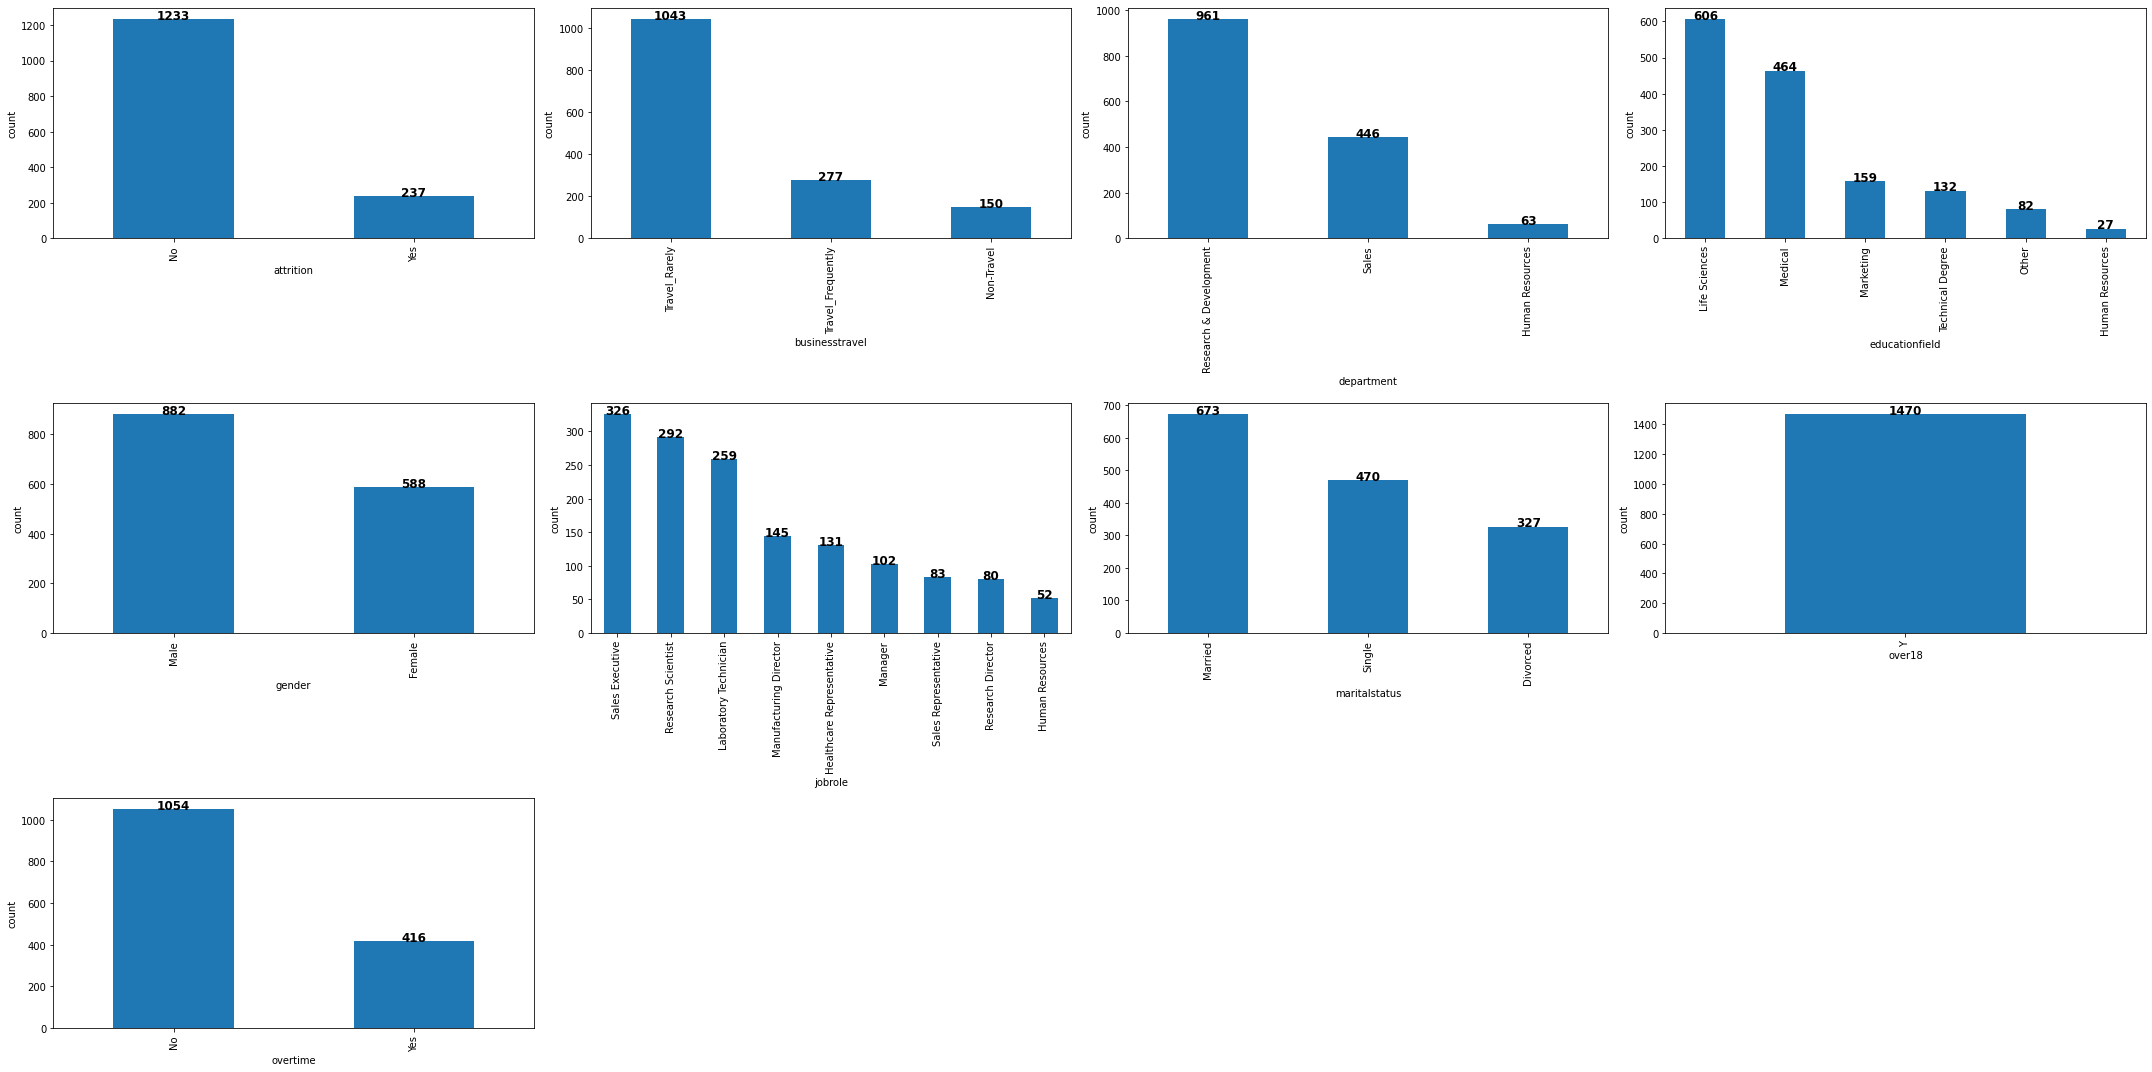

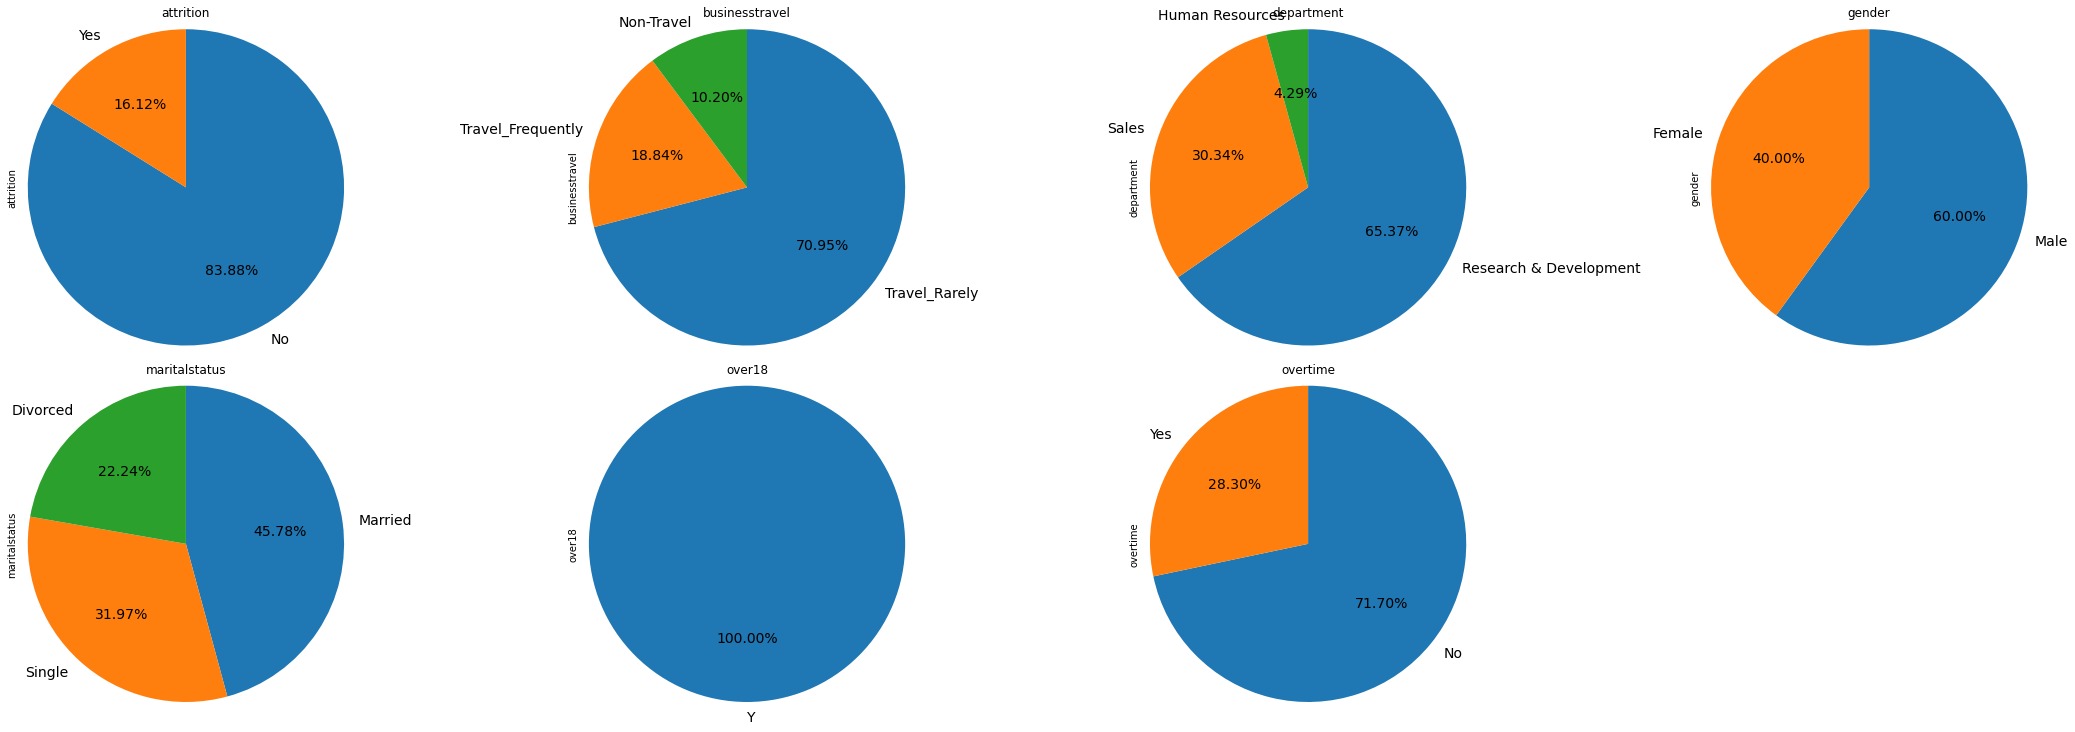

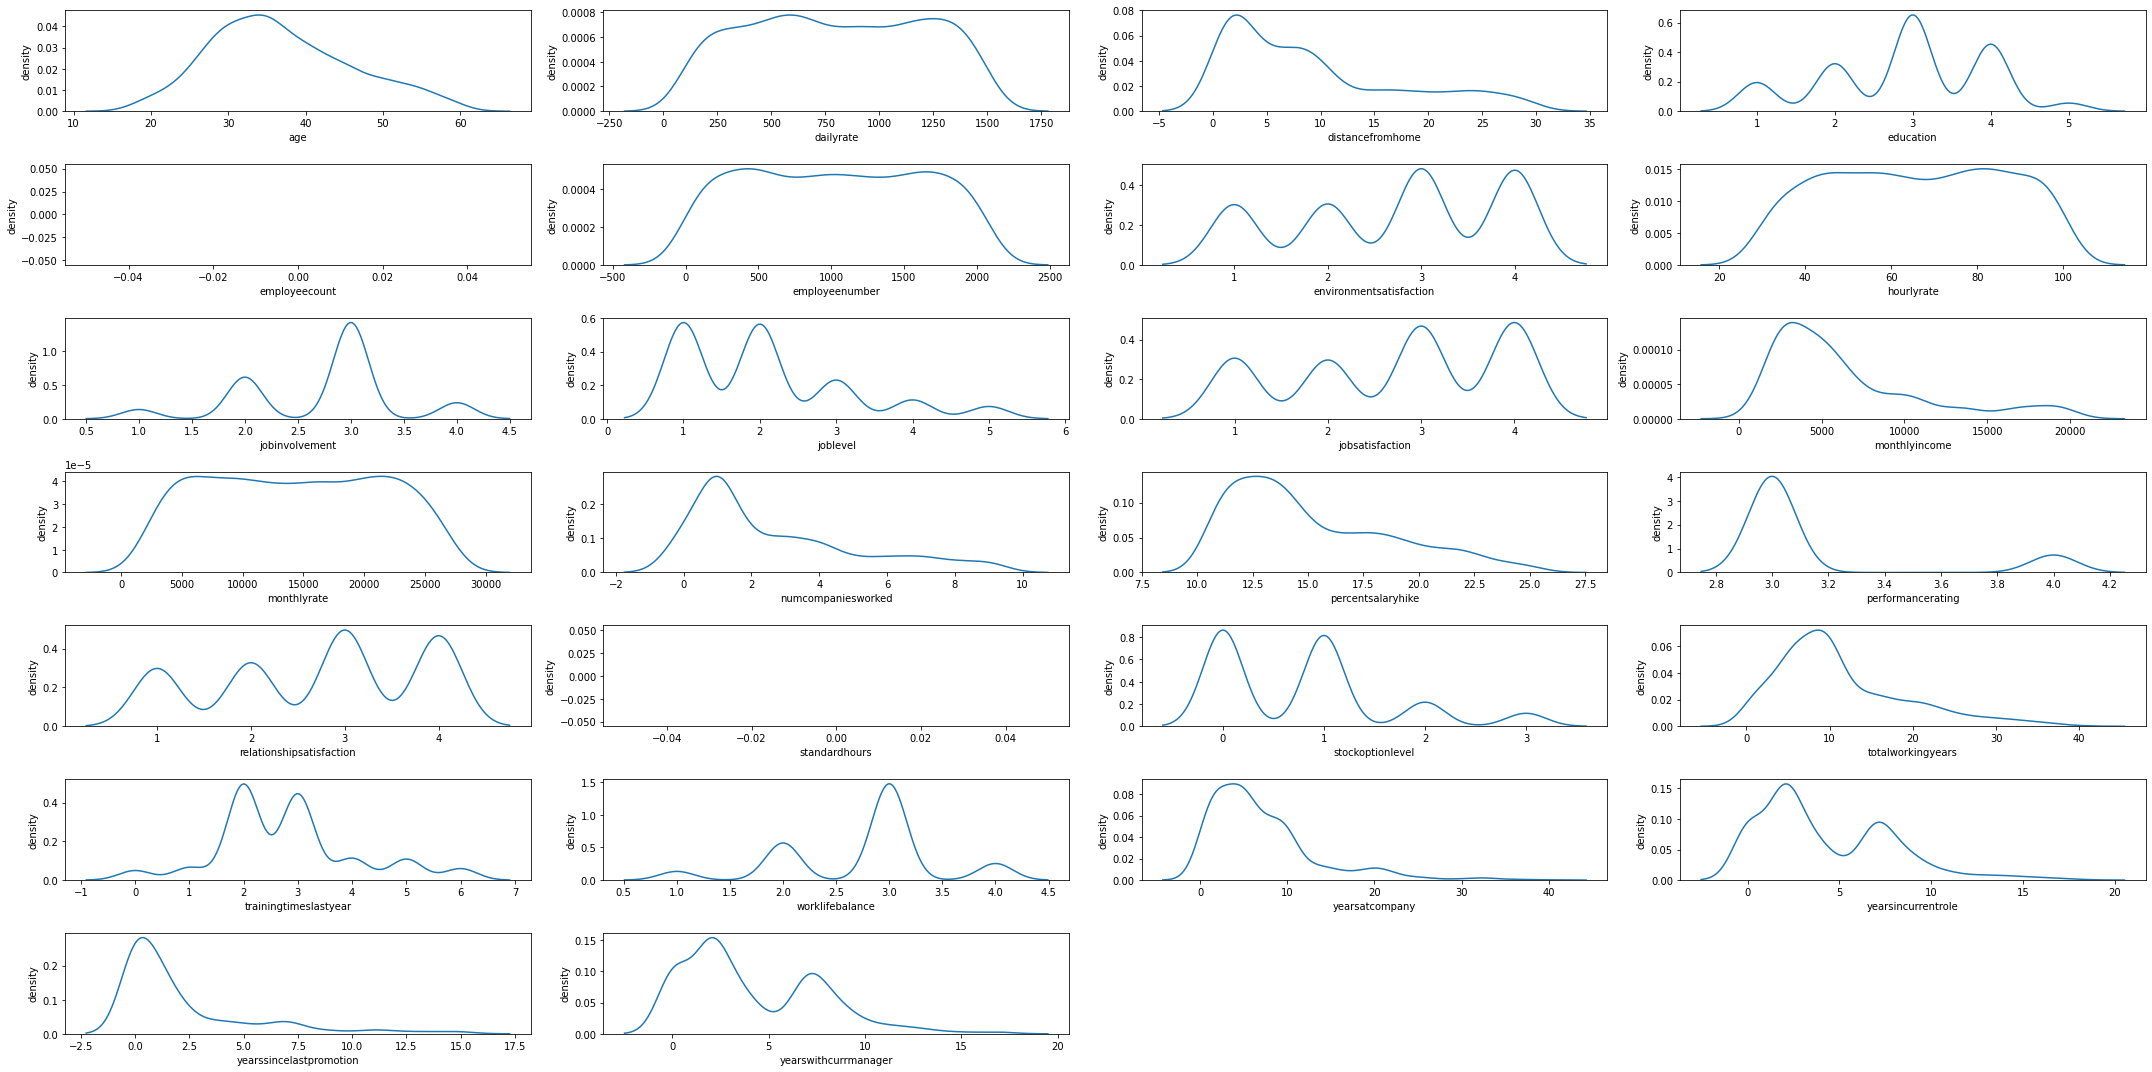

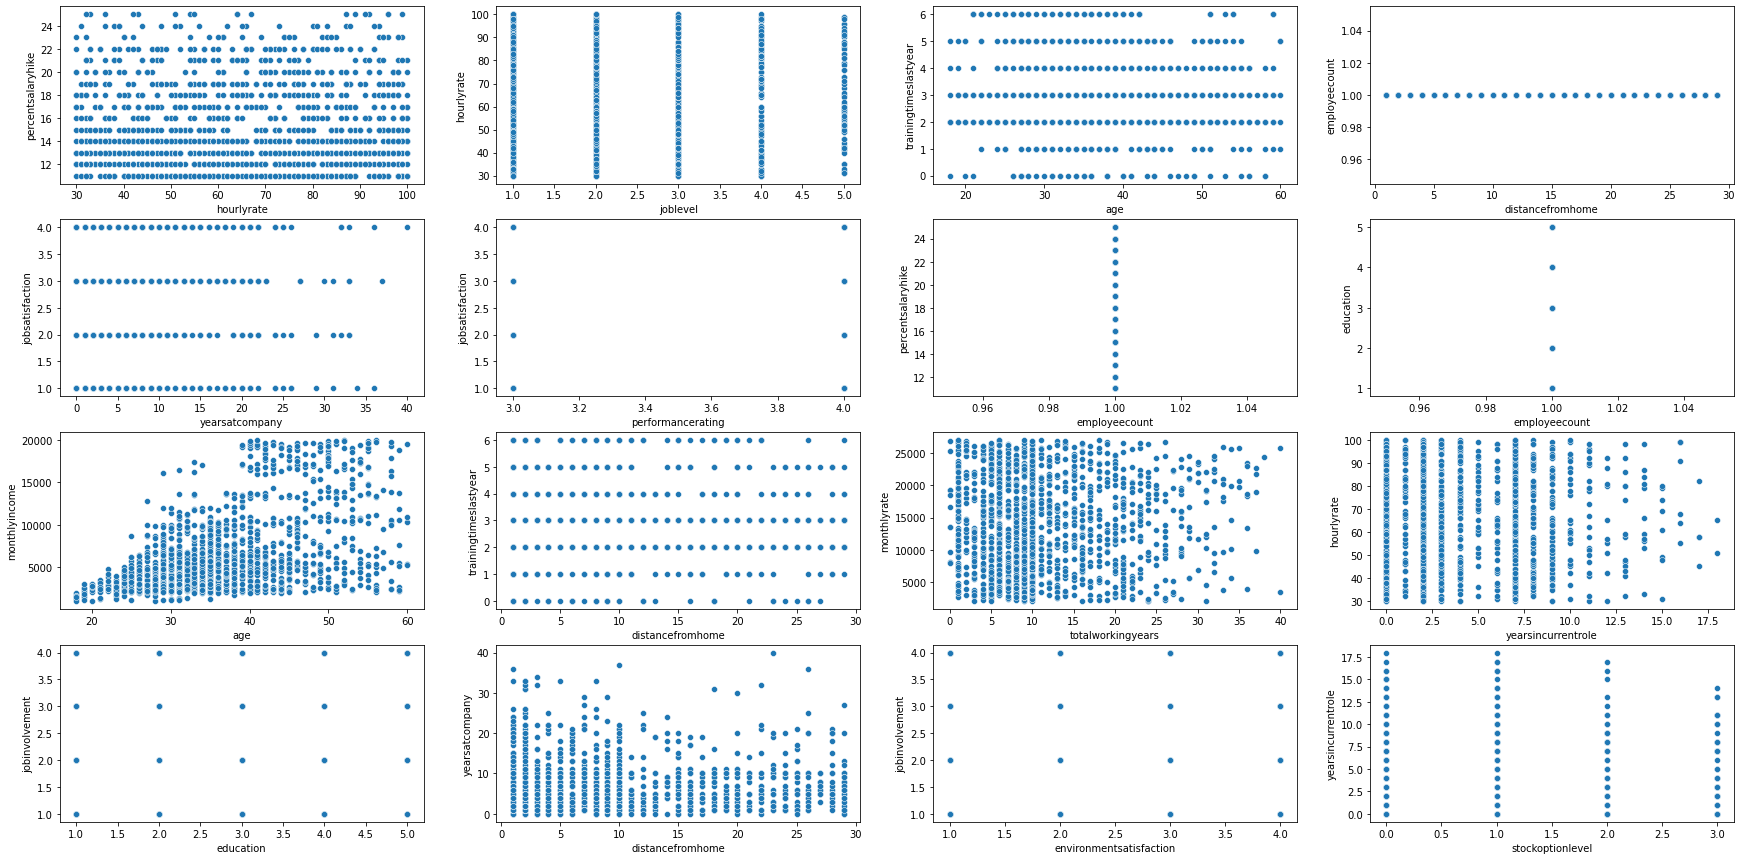

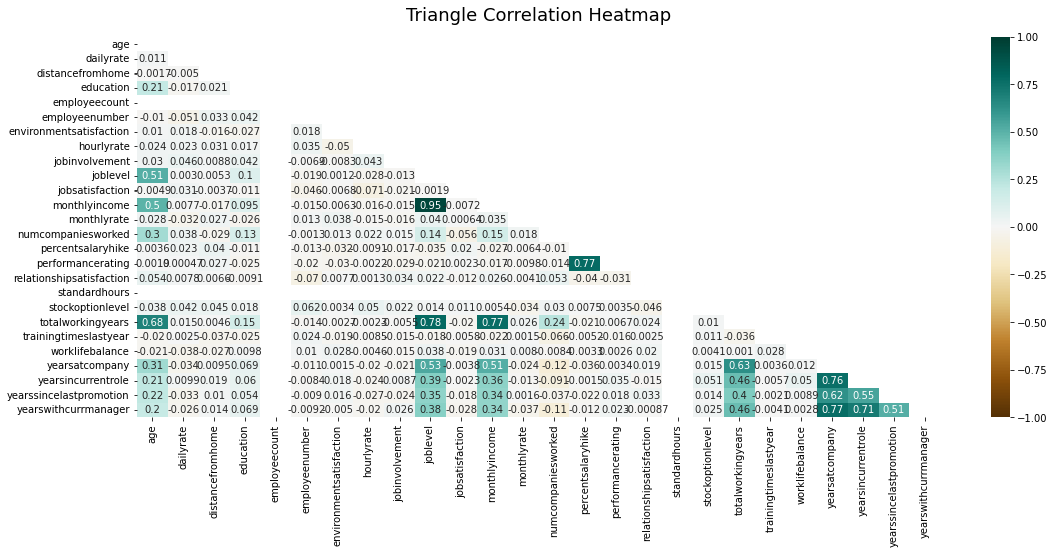

In [2]:
data = eda_script('./WA_Fn-UseC_-HR-Employee-Attrition.csv' , box_plot=False)

In [3]:
data['attrition'] = data['attrition'].replace('Yes' , 1)
data['attrition'] = data['attrition'].replace('No' , 0)

> i modified thee script and give the option to use boxplot or not
- we did not use box plot because of the huge number of column so i will do the manually

<a id='insights_from_exploring_script_results'></a>
## insights from exploring script results :



1- `employeecount` column for all the rows has the same value 1 so we will drop it ` i get this from data describtion as min and max are the same `

2- `over18` column also has the same value yes for all rows so i will also drop it

3- `standardhours`	also has the same value for all the rows which is 80

4- `monthlyincome` may have outliers

5- `employeenumber` has alot of unique values so i may be as employee id thus i will drop it

6- there is a high corr between `joblevel and monthlyincome ` => `0.95` and that will lead to `Multicollinearity` problem
- Multicollinearity happens when one predictor `"indepented"` variable in a multiple regression model can be linearly predicted from the others with a high degree of accuracy. This can lead to skewed or misleading results. Luckily, decision trees and boosted trees algorithms are immune to multicollinearity by nature. When they decide to split, the tree will choose only one of the perfectly correlated features. However, other algorithms like Logistic Regression or Linear Regression are not immune to that problem and you should fix it before training the model.
- not just there is a corr between `joblevel and monthlyincome ` there is other correlated features so we should consider cleaing that `using PCA` maybe
- i will try using PCA to get rid of correlated features , and i will also try feature selection to see which one will be better
- because there are many correlated features i can not just fix it manually 
- note : i will also consider using `l1` to work as build in feature selaection 

- Imbalanced dataset: 1237 (84% of cases) employees did not leave the organization while 237 (16% of cases) did leave the organization 

<a id='data_cleanning'></a>
## data_cleanning : 

> i will drop the one value coulmns first

In [4]:
df = data.copy()

In [5]:
df['attrition'] = df['attrition'].replace('Yes' , 1)
df['attrition'] = df['attrition'].replace('No' , 0)

In [6]:
df['performancerating'].value_counts()

3    1244
4     226
Name: performancerating, dtype: int64

In [7]:
df.drop(['employeecount' , 'over18' ,'standardhours' ,'employeenumber'] , axis = 1 , inplace = True)

In [8]:
df.shape[1]
# before doing anthing just from observation i was able to reduce number of features
# - now i only have 30 features and 1 target variable

31

In [9]:
from script import  seperate_columns
num_col , cat_col =  seperate_columns(df)

In [10]:
print('len of numerical variables is : ',len(num_col))
print('len of categorical variables is : ',len(cat_col))

len of numerical variables is :  24
len of categorical variables is :  7


<a id='cleanning_summary'></a>
## summary : 
-  i droped `employeecount` , `over18` ,`standardhours` ,`employeenumber` because they only have one value for all rows
- i chnaged `attrition` to unmerical col with `1 , 0` values
> we have a lot of features , have alot of features may lead to overfitting or it may reduce the accuracy if there were irrelevent column , of cource ib addition to the huge comutational time 
- so we need to reduce the dimensinality of our feature :
   - we can do that using feature selection in which we will select the high ranked columns amoung all the columns that we have
   - we can use feature extraction where we will extract new feature from our features using ways like `PCA`
- i will try the two methods and see which one give me better results     

<a id='split_the_data'></a>
## splitting the data :

> #### note that : we should split the data first before anything
 - and because we are having imbalanced data then i should use `stratified sampling`.
 - note that i will oversample the training data after spliting ,but ican't oversample the whole dataset before spliting 
   - and that is because when spliting , test set may have some samples as in the train  

In [11]:
split = StratifiedShuffleSplit(n_splits = 1 , test_size = 0.3 , random_state=42) 
for train_index , test_index in split.split(df , df[['attrition','performancerating']]):
    train_set = df.loc[train_index]
    test_set = df.loc[test_index]

In [12]:
train_set['attrition'].value_counts()[0]/train_set['attrition'].value_counts()[1]

5.198795180722891

In [14]:
test_set['attrition'].value_counts()[0]/test_set['attrition'].value_counts()[1]

5.211267605633803

In [13]:
train_set['performancerating'].value_counts()[3]/train_set['performancerating'].value_counts()[4]

5.512658227848101

In [15]:
test_set['performancerating'].value_counts()[3]/test_set['performancerating'].value_counts()[4]

5.485294117647059

> we can see that test set and train set almost have the same ratio of target calss
- let's see what will happen if we only used train_test_split

In [16]:
train, test = train_test_split(df, test_size=0.3, random_state=42)

In [17]:
print(train['attrition'].value_counts()[0] /train['attrition'].value_counts()[1] )
print(test['attrition'].value_counts()[0] /test['attrition'].value_counts()[1] )

4.846590909090909
6.229508196721311


In [18]:
print(train_set['performancerating'].value_counts()[3]/train_set['performancerating'].value_counts()[4])
print(test_set['performancerating'].value_counts()[3]/test_set['performancerating'].value_counts()[4])

5.512658227848101
5.485294117647059


> performancerating is the same but attrition , so i will use train_set and test_set
 - now let's forget about test_set and start explore train_set

<a id='feature_engineering'></a>
### feature selection :

In [19]:
X = train_set.copy()
y = X[['attrition','performancerating']]
X.drop(['attrition','performancerating'] , axis= 1 , inplace= True)

In [20]:
X.head()

,age,businesstravel,dailyrate,department,distancefromhome,education,educationfield,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,relationshipsatisfaction,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
80,30,Travel_Rarely,852,Research & Development,1,1,Life Sciences,4,Male,55,2,2,Laboratory Technician,4,Married,5126,15998,1,Yes,12,3,2,10,1,2,10,8,3,0
1186,35,Travel_Frequently,880,Sales,12,4,Other,4,Male,36,3,2,Sales Executive,4,Single,4581,10414,3,Yes,24,1,0,13,2,4,11,9,6,7
1299,40,Travel_Rarely,1194,Research & Development,1,3,Life Sciences,3,Female,52,3,2,Healthcare Representative,4,Divorced,6513,9060,4,No,17,4,1,12,3,3,5,3,0,3
1314,45,Non-Travel,589,Sales,2,4,Life Sciences,3,Female,67,3,2,Sales Executive,3,Married,5154,19665,4,No,22,2,2,10,3,4,8,7,5,7
442,36,Non-Travel,635,Sales,10,4,Medical,2,Male,32,3,3,Sales Executive,4,Single,9980,15318,1,No,14,4,0,10,3,2,10,3,9,7


> an inportant step before using `mutual_info_classif` we should first encode categorical column or it will thorw an error
 - it dose not matter the type of categorical column i just need it to be int to i will use `ordinal encoder`

In [21]:
for colname in cat_col:
    X[colname], _ = X[colname].factorize()
    # This method is useful for obtaining a numeric representation of an array when all that matters is identifying distinct values.

In [22]:
# from sklearn.compose import  ColumnTransformer
# from sklearn.preprocessing import  OrdinalEncoder
# trans_col = ColumnTransformer([('cat' , OrdinalEncoder() , cat_col )] , remainder = 'passthrough')
# trans_X = trans_col.fit_transform(X)

In [23]:
# because we have categorical target variable we will use `mutual_info_classif`
from sklearn.feature_selection import mutual_info_classif
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features, random_state=42 , copy = True)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [24]:
mi_scores = make_mi_scores(X, y['attrition'], 'auto')
mi_scores

age                         0.033961
overtime                    0.029173
businesstravel              0.028050
stockoptionlevel            0.026677
monthlyincome               0.023787
joblevel                    0.021236
environmentsatisfaction     0.018661
worklifebalance             0.018109
yearswithcurrmanager        0.014062
jobinvolvement              0.010212
maritalstatus               0.010046
jobrole                     0.009698
numcompaniesworked          0.008371
trainingtimeslastyear       0.007803
yearssincelastpromotion     0.006068
dailyrate                   0.004654
jobsatisfaction             0.004205
education                   0.004179
monthlyrate                 0.001101
totalworkingyears           0.000000
yearsincurrentrole          0.000000
yearsatcompany              0.000000
hourlyrate                  0.000000
department                  0.000000
relationshipsatisfaction    0.000000
distancefromhome            0.000000
educationfield              0.000000
g

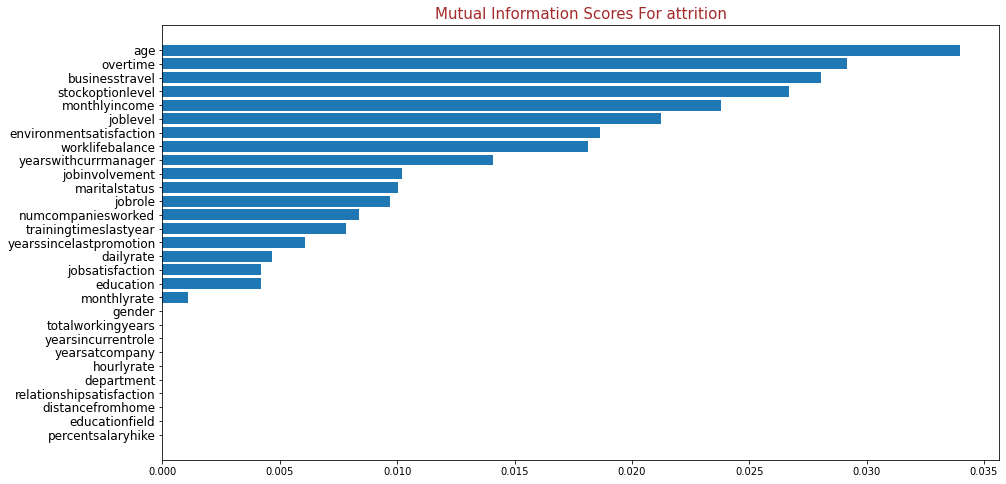

In [25]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks, fontsize=12)
    plt.title("Mutual Information Scores For attrition", fontsize=15, color='brown')


plt.figure(figsize=(15, 8))
plot_mi_scores(mi_scores)

In [26]:
mi_scores[19:]

totalworkingyears           0.0
yearsincurrentrole          0.0
yearsatcompany              0.0
hourlyrate                  0.0
department                  0.0
relationshipsatisfaction    0.0
distancefromhome            0.0
educationfield              0.0
gender                      0.0
percentsalaryhike           0.0
Name: MI Scores, dtype: float64

## note : i tried to use only the column from MI  and the accuracy was not that good so i will use the correlation alos to see which features to drop

In [27]:
np.abs(df.corr()['attrition']).sort_values(ascending = False)

attrition                   1.000000
totalworkingyears           0.171063
joblevel                    0.169105
yearsincurrentrole          0.160545
monthlyincome               0.159840
age                         0.159205
yearswithcurrmanager        0.156199
stockoptionlevel            0.137145
yearsatcompany              0.134392
jobinvolvement              0.130016
jobsatisfaction             0.103481
environmentsatisfaction     0.103369
distancefromhome            0.077924
worklifebalance             0.063939
trainingtimeslastyear       0.059478
dailyrate                   0.056652
relationshipsatisfaction    0.045872
numcompaniesworked          0.043494
yearssincelastpromotion     0.033019
education                   0.031373
monthlyrate                 0.015170
percentsalaryhike           0.013478
hourlyrate                  0.006846
performancerating           0.002889
Name: attrition, dtype: float64

> hourrate , relationshipsatisfaction , percentsalaryhike
  - these are numerical column that has small values in both correlation and MI
> gender , educationfield , department 
  - these are categorical columns that has small values in MI 

In [28]:
gender_attrition= df.groupby(['gender','attrition']).size().unstack() # size => count
gender_attrition

attrition,0,1
gender,,
Female,501,87
Male,732,150


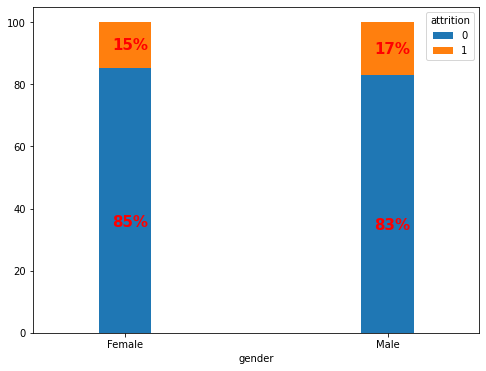

In [29]:
ax = (gender_attrition*100.0 / gender_attrition.values.sum(axis=1).reshape(-1, 1)).plot(kind='bar',
                                                                                            width = 0.2,
                                                                                            stacked = True,
                                                                                            rot = 0, 
                                                                                            figsize = (8,6) )

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    _x, _y = p.get_xy() 
    ax.text(_x+.25*width, _y+.4*height, '{:.0f}%'.format(height), color = 'red', weight = 'bold', fontsize=15)

> so gender do no affect `attrition`

In [30]:
def plot_bar(col1,col2):
    cat_plot= df.groupby([col1,col2]).size().unstack() # size => count
    ax = (cat_plot*100.0 / cat_plot.values.sum(axis=1).reshape(-1, 1)).plot(kind='bar',
                                                                                            width = 0.2,
                                                                                            stacked = True,
                                                                                            rot = 0, 
                                                                                            figsize = (8,6) )
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        _x, _y = p.get_xy() 
        ax.text(_x+.25*width, _y+.4*height, '{:.0f}%'.format(height), color = 'red', weight = 'bold', fontsize=10)

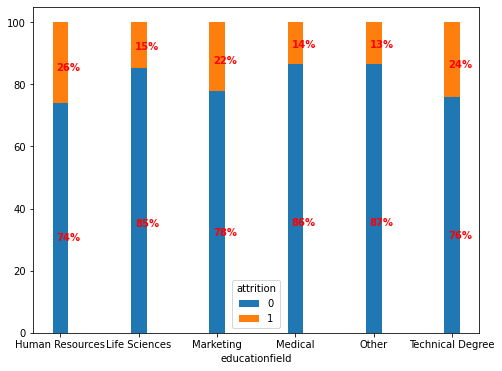

In [31]:
plot_bar('educationfield','attrition')

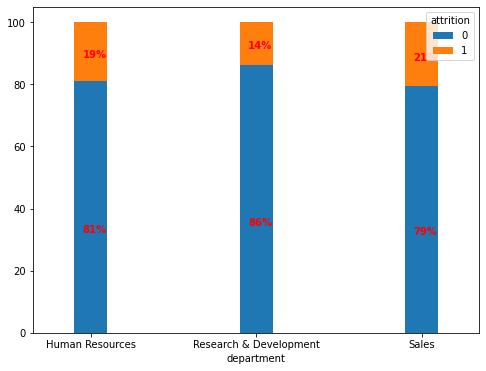

In [32]:
plot_bar('department','attrition')

> `gender , educationfield , department` does not affect   `attrition`

> so untill now columns that we consider to drop are : `gender , educationfield , department , hourrate , relationshipsatisfaction , percentsalaryhike`

### now let's see `performancerating`

In [33]:
mi_scores = make_mi_scores(X, y['performancerating'], 'auto')
mi_scores

percentsalaryhike           0.429299
educationfield              0.016079
dailyrate                   0.016006
maritalstatus               0.014870
yearswithcurrmanager        0.012881
jobsatisfaction             0.008334
monthlyrate                 0.006648
department                  0.005993
businesstravel              0.005534
yearssincelastpromotion     0.005302
relationshipsatisfaction    0.004953
numcompaniesworked          0.003044
stockoptionlevel            0.001697
yearsincurrentrole          0.000000
yearsatcompany              0.000000
worklifebalance             0.000000
trainingtimeslastyear       0.000000
totalworkingyears           0.000000
education                   0.000000
overtime                    0.000000
distancefromhome            0.000000
monthlyincome               0.000000
jobrole                     0.000000
joblevel                    0.000000
jobinvolvement              0.000000
hourlyrate                  0.000000
gender                      0.000000
e

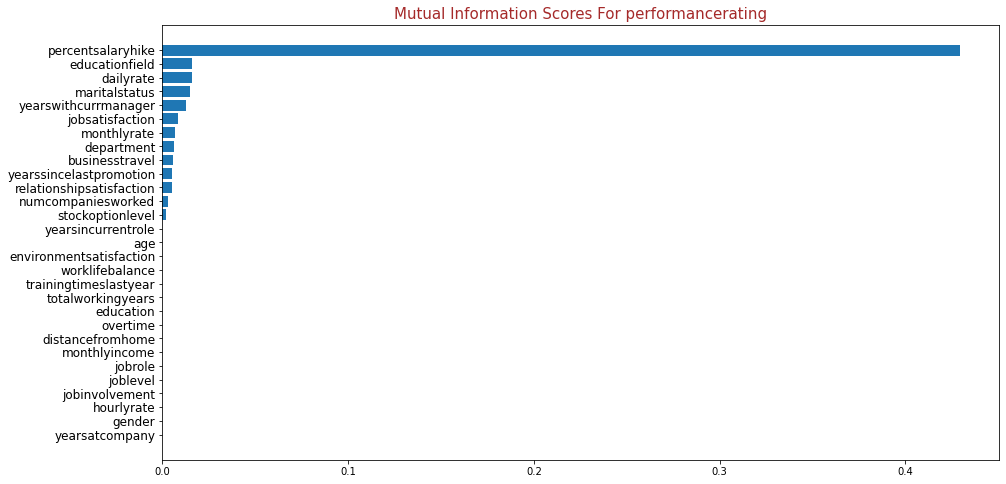

In [34]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks, fontsize=12)
    plt.title("Mutual Information Scores For performancerating", fontsize=15, color='brown')


plt.figure(figsize=(15, 8))
plot_mi_scores(mi_scores)

- i will not drop `relationshipsatisfaction , percentsalaryhike` as they effect performance
- i am certain now to drop `gender , hourrate`
- i want to make sure if `educationfield , department` effect performance

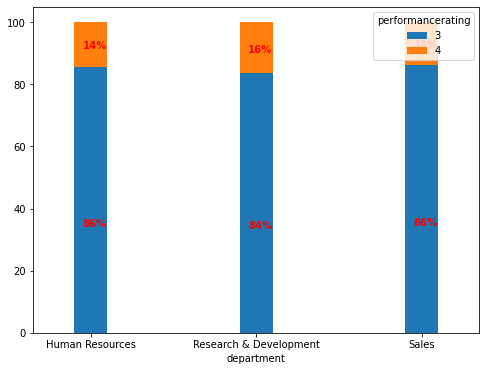

In [35]:
plot_bar('department','performancerating')

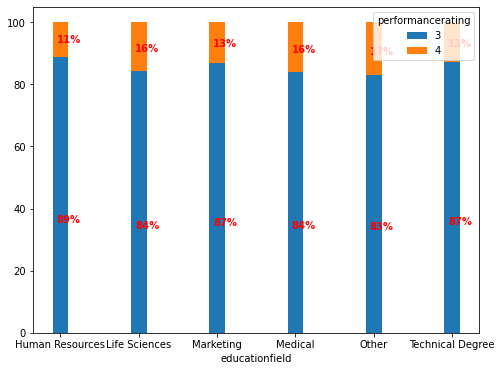

In [36]:
plot_bar('educationfield','performancerating')

> they dont affect so i will drop them

In [37]:
drop_features = ['gender','department','educationfield','hourlyrate']

In [38]:
X_train = train_set.drop(drop_features , axis=1)
X_train = X_train.drop(['attrition','performancerating'] , axis=1)
y_train = y

In [39]:
print(X_train.shape)
print(y_train.shape)

(1029, 25)
(1029, 2)


In [40]:
X_train.head()

,age,businesstravel,dailyrate,distancefromhome,education,environmentsatisfaction,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,relationshipsatisfaction,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
80,30,Travel_Rarely,852,1,1,4,2,2,Laboratory Technician,4,Married,5126,15998,1,Yes,12,3,2,10,1,2,10,8,3,0
1186,35,Travel_Frequently,880,12,4,4,3,2,Sales Executive,4,Single,4581,10414,3,Yes,24,1,0,13,2,4,11,9,6,7
1299,40,Travel_Rarely,1194,1,3,3,3,2,Healthcare Representative,4,Divorced,6513,9060,4,No,17,4,1,12,3,3,5,3,0,3
1314,45,Non-Travel,589,2,4,3,3,2,Sales Executive,3,Married,5154,19665,4,No,22,2,2,10,3,4,8,7,5,7
442,36,Non-Travel,635,10,4,2,3,3,Sales Executive,4,Single,9980,15318,1,No,14,4,0,10,3,2,10,3,9,7


> what we still have to do is to fix the problem of imbalanced data , encode categorical variables and scale the data

<a id='dealing_with_imbalanced_data'></a>
## dealing_with_imbalanced_data:

In [41]:
from sklearn.utils import resample

In [42]:
X = pd.concat([X_train, y_train], axis=1)
X.head()

,age,businesstravel,dailyrate,distancefromhome,education,environmentsatisfaction,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,relationshipsatisfaction,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,attrition,performancerating
80,30,Travel_Rarely,852,1,1,4,2,2,Laboratory Technician,4,Married,5126,15998,1,Yes,12,3,2,10,1,2,10,8,3,0,0,3
1186,35,Travel_Frequently,880,12,4,4,3,2,Sales Executive,4,Single,4581,10414,3,Yes,24,1,0,13,2,4,11,9,6,7,1,4
1299,40,Travel_Rarely,1194,1,3,3,3,2,Healthcare Representative,4,Divorced,6513,9060,4,No,17,4,1,12,3,3,5,3,0,3,0,3
1314,45,Non-Travel,589,2,4,3,3,2,Sales Executive,3,Married,5154,19665,4,No,22,2,2,10,3,4,8,7,5,7,0,4
442,36,Non-Travel,635,10,4,2,3,3,Sales Executive,4,Single,9980,15318,1,No,14,4,0,10,3,2,10,3,9,7,0,3


In [43]:
X.groupby('attrition')['performancerating'].value_counts().unstack()

performancerating,3,4
attrition,,
0,731,132
1,140,26


In [44]:
# separate minority and majority classes
performancerating_3 = X[X['performancerating']==3]
performancerating_4 = X[X['performancerating']==4]

# upsample minority
performancerating_upsampled = resample(performancerating_4,
                          replace=True, # sample with replacement
                          n_samples=len(performancerating_3), # match number in majority class
                          random_state=42) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([performancerating_3, performancerating_upsampled])

# check new class counts
display(upsampled['attrition'].value_counts())
display(upsampled['performancerating'].value_counts())

0    1430
1     312
Name: attrition, dtype: int64

3    871
4    871
Name: performancerating, dtype: int64

In [45]:
# separate minority and majority classes
not_attrition = upsampled[upsampled['attrition']==0]
attrition = upsampled[upsampled['attrition']==1]

# upsample minority
attrition_upsampled = resample(attrition,
                          replace=True, # sample with replacement
                          n_samples=len(not_attrition), # match number in majority class
                          random_state=42) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_attrition, attrition_upsampled])

# check new class counts
display(upsampled['attrition'].value_counts())
display(upsampled['performancerating'].value_counts())

0    1430
1    1430
Name: attrition, dtype: int64

4    1503
3    1357
Name: performancerating, dtype: int64

> i maneged to balance the two taeget columns

In [46]:
y_train_upsamle = upsampled[['attrition','performancerating']]
X_train_upsample = upsampled.drop(['attrition','performancerating'], axis=1)
# i get an error while using sklearn when col name was int so i changed it

<AxesSubplot:ylabel='attrition'>

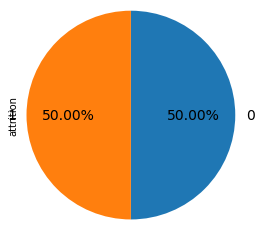

In [47]:
val_count = y_train_upsamle['attrition'].value_counts()
y_train_upsamle['attrition'].value_counts().plot.pie(autopct='%.2f%%',labels=val_count.index,startangle=90,counterclock=False , radius=1.2, textprops={'fontsize':14})

<AxesSubplot:ylabel='performancerating'>

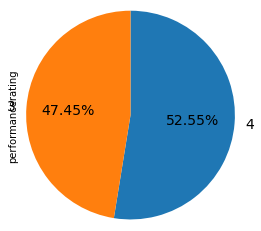

In [48]:
val_count = y_train_upsamle['performancerating'].value_counts()
y_train_upsamle['performancerating'].value_counts().plot.pie(autopct='%.2f%%',labels=val_count.index,startangle=90,counterclock=False , radius=1.2, textprops={'fontsize':14})

<a id='features_normalize_and_onehot_encoding'></a>
### now for encoding and normalizing :

In [49]:
num_col , cat_col =  seperate_columns(X_train_upsample)
cat_col

['businesstravel', 'jobrole', 'maritalstatus', 'overtime']

> we one only have 4 col columns 
- we will use ordinal encoder with `overtime`
- and onehot encoder with `jobrole` , `maritalstatus` and `businesstravel`

In [50]:
scaler = StandardScaler()
X_train_upsample[num_col] = scaler.fit_transform(X_train_upsample[num_col])

In [51]:
X_train_upsample['overtime'], _ =X_train_upsample['overtime'].factorize()

In [52]:
from sklearn.compose import  ColumnTransformer
from sklearn.preprocessing import  OneHotEncoder ,  LabelEncoder
transform = ColumnTransformer([('nominal_cat' , OneHotEncoder() , ['jobrole','maritalstatus','businesstravel'] )]  
                              , remainder='passthrough')

In [53]:
X_train_upsample = transform.fit_transform(X_train_upsample)

In [54]:
X_train_upsample.shape

(2860, 37)

<a id='building_models'></a>
## building_models:

**1. logistic regression**

In [55]:
from sklearn.multioutput import MultiOutputClassifier
log_model_cv = LogisticRegressionCV(cv=10 , penalty='l1'  , solver = 'saga')

X_train, X_val, y_train, y_val = train_test_split(X_train_upsample, y_train_upsamle, test_size=0.2, random_state=42)

log_model_cv = MultiOutputClassifier(log_model_cv).fit(X_train,y_train)
log_model_cv_score = log_model_cv.score(X_val , y_val)
log_model_cv_score

0.8059440559440559

In [56]:
sgd_log_classifier  = SGDClassifier(loss = 'log_loss' , penalty='l2')

sgd_log_classifier = MultiOutputClassifier(sgd_log_classifier).fit(X_train,y_train)
sgd_log_classifier_score = sgd_log_classifier.score(X_val , y_val)
sgd_log_classifier_score


# note : if we run this cell another time it will get us another score

0.7447552447552448

> logistic regression with batch gradient gived better results than SGD 

**2. Random Forest**

In [400]:
param_grid = [
    {'n_estimators':[3,10,30] , 'max_features' :[2,4,6,8] , 'min_samples_split' :[5,10,15]}
]

In [424]:

# forest = (GridSearchCV(estimator=MultiOutputClassifier(RandomForestClassifier()), 
#                       param_grid=param_grid, 
#                       cv=5,
#                       scoring = 'f1',
#                       n_jobs = -1))

# forest = forest.fit(X_train,y_train)
# forest.best_estimator_
# # so slow  

> i will not use gridsearch i will just use train and val 

In [58]:
forest = RandomForestClassifier(max_features=2, min_samples_split=5, n_estimators=30)
forest = MultiOutputClassifier(forest).fit(X_train,y_train)
forest_score = forest.score(X_val , y_val)
forest_score

0.9877622377622378

**3. SVC**

In [71]:
svc_model = SVC(degree = 3, kernel= 'poly')

svc_model = MultiOutputClassifier(svc_model).fit(X_train,y_train)
svc_score = svc_model.score(X_val , y_val)
svc_score

0.9458041958041958

In [72]:
sgd_svc_classifier  = SGDClassifier(loss = 'hinge' , penalty='l2') # SVC takes l2
sgd_svc_classifier = MultiOutputClassifier(sgd_svc_classifier).fit(X_train,y_train)
sgd_svc_classifier_score = sgd_svc_classifier.score(X_val , y_val)
sgd_svc_classifier_score


0.7552447552447552

> `sgd_svc_classifier` gives better performance than `svc`

**4. XGBoosting**

In [77]:
y_train_ = y_train.copy()

In [78]:
y_train_.replace([3,4],[0,1],inplace=True)
y_train_

,attrition,performancerating
792,1,1
1332,1,1
471,0,0
1271,1,0
440,1,0
...,...,...
21,1,1
1,0,1
587,0,1
476,0,1


In [81]:
y_val_ = y_val.copy()

In [82]:
y_val_.replace([3,4],[0,1],inplace=True)
y_val_

,attrition,performancerating
1339,1,1
798,1,1
651,0,1
1333,1,1
284,0,0
...,...,...
332,0,0
1354,1,0
1199,0,0
792,1,1


> XGBoosting gave me an error that it was expected unique values `0,1` but `3,4` were given and that is why i encoded `performancerating` to `0 and 1`

In [122]:
xgb_model = XGBClassifier(learning_rate = 0.4, max_depth = 8, n_estimators = 50, subsample = 0.9 )

xgb_model = MultiOutputClassifier(xgb_model).fit(X_train,y_train_)
xg_score = xgb_model.score(X_val , y_val_)
xg_score

0.9737762237762237

**5. ADA Boost**

In [87]:

ada = AdaBoostClassifier(learning_rate = 0.6, n_estimators = 40)
ada = MultiOutputClassifier(ada).fit(X_train,y_train)
ada_score = ada.score(X_val , y_val)
ada_score


0.8583916083916084

> i expected `ADA` to be the same as `XGBoosting` but no i used X_train and y_train

**6. Naive Bayes**

In [91]:
gnb = GaussianNB()
gnb = MultiOutputClassifier(gnb).fit(X_train,y_train)
gnb_score = gnb.score(X_val , y_val)
gnb_score


0.5944055944055944

<a id='test_set'></a>
## test_set:
### now let's see the test set

In [92]:
test_set.head()

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
1284,39,0,Travel_Rarely,1253,Research & Development,10,1,Medical,3,Male,65,3,3,Research Director,3,Single,13464,7914,7,No,21,4,3,0,9,3,3,4,3,2,2
1098,40,0,Non-Travel,1142,Research & Development,8,2,Life Sciences,4,Male,72,3,2,Healthcare Representative,4,Divorced,4069,8841,3,Yes,18,3,3,0,8,2,3,2,2,2,2
313,33,0,Travel_Frequently,553,Research & Development,5,4,Life Sciences,4,Female,74,3,3,Manager,2,Married,11878,23364,6,No,11,3,2,2,12,2,3,10,6,8,8
790,33,0,Travel_Rarely,654,Research & Development,5,3,Life Sciences,4,Male,34,2,3,Healthcare Representative,4,Divorced,7119,21214,4,No,15,3,3,1,9,2,3,3,2,1,2
892,19,1,Non-Travel,504,Research & Development,10,3,Medical,1,Female,96,2,1,Research Scientist,2,Single,1859,6148,1,Yes,25,4,2,0,1,2,4,1,1,0,0


<a id='transfer_test_set_as_We_did_with_train_set'></a>
## transfer_test_set_as_We_did_with_train_set:

In [93]:
train_set.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1029.0,37.164237,9.155129,18.0,30.0,36.0,43.0,60.0
attrition,1029.0,0.161322,0.368006,0.0,0.0,0.0,0.0,1.0
dailyrate,1029.0,808.304179,405.021453,102.0,465.0,807.0,1167.0,1498.0
distancefromhome,1029.0,8.912536,8.103785,1.0,2.0,7.0,13.0,29.0
education,1029.0,2.905734,1.015376,1.0,2.0,3.0,4.0,5.0
environmentsatisfaction,1029.0,2.703596,1.088763,1.0,2.0,3.0,4.0,4.0
hourlyrate,1029.0,65.125364,20.403918,30.0,48.0,65.0,83.0,100.0
jobinvolvement,1029.0,2.707483,0.696679,1.0,2.0,3.0,3.0,4.0
joblevel,1029.0,2.052478,1.101452,1.0,1.0,2.0,3.0,5.0
jobsatisfaction,1029.0,2.736638,1.100773,1.0,2.0,3.0,4.0,4.0


In [94]:
test_set.describe().T

,count,mean,std,min,25%,50%,75%,max
age,441.0,36.362812,9.074684,18.0,30.0,35.0,42.0,60.0
attrition,441.0,0.160998,0.367946,0.0,0.0,0.0,0.0,1.0
dailyrate,441.0,788.909297,400.086066,104.0,469.0,793.0,1142.0,1499.0
distancefromhome,441.0,9.845805,8.085553,1.0,3.0,8.0,16.0,29.0
education,441.0,2.929705,1.045359,1.0,2.0,3.0,4.0,5.0
environmentsatisfaction,441.0,2.764172,1.103171,1.0,2.0,3.0,4.0,4.0
hourlyrate,441.0,67.678005,20.064004,30.0,51.0,68.0,86.0,100.0
jobinvolvement,441.0,2.782313,0.743307,1.0,2.0,3.0,3.0,4.0
joblevel,441.0,2.090703,1.120442,1.0,1.0,2.0,3.0,5.0
jobsatisfaction,441.0,2.709751,1.108693,1.0,2.0,3.0,4.0,4.0


In [95]:
X_test = test_set.drop(drop_features , axis=1)
X_test = X_test.drop(['attrition','performancerating'] , axis=1)
y_test = test_set[['attrition','performancerating']]

In [96]:
def data_preprocessing( df: pd.DataFrame)  -> pd.DataFrame :
     
    num_col , cat_col =  seperate_columns(df)
    df[num_col] = scaler.transform(df[num_col])
    df['overtime'], _ =df['overtime'].factorize()
    df = transform.transform(df)
    return df

In [97]:
X_test = data_preprocessing(X_test)

In [98]:
X_test.shape

(441, 37)

<a id='apply_trained_models_on_test_set'></a>
## apply_trained_models_on_test_set:

**1. test_log**

In [99]:
log_model_cv_score_test = log_model_cv.score(X_test ,y_test )
log_model_cv_score_test

0.5827664399092971

**2. test_log_SGD**

In [100]:
sgd_log_classifier_test = sgd_log_classifier.score(X_test ,y_test )
sgd_log_classifier_test

0.4988662131519274

**3. test_SVC**

In [101]:
SVC_score_test = svc_model.score(X_test ,y_test)
print(SVC_score_test)

0.7551020408163265


**4. test_SVC_SGD**

In [102]:
sgd_svc_classifier_test = sgd_svc_classifier.score(X_test ,y_test)
print(sgd_svc_classifier_test)


0.546485260770975


**5. test_forest**

In [103]:
forest_score_test = forest.score(X_test ,y_test )
forest_score_test

0.8253968253968254

**6. test_XGBoosting**

In [105]:
y_test_ = y_test.copy()
y_test_.replace([3,4],[0,1],inplace = True)

In [123]:
xg_score_test = xgb_model.score(X_test ,y_test_)
print(xg_score_test)

0.7324263038548753


**7. test_ADA Boost**

In [107]:
ada_score_test = ada.score(X_test ,y_test)
print(ada_score_test)

0.564625850340136


**8. test_naive base**

In [108]:
gnb_score_test = gnb.score(X_test ,y_test)
print(gnb_score_test)

0.5056689342403629


<a id='compare_results'></a>
## compare_results:

In [109]:
result = [[log_model_cv_score , log_model_cv_score_test],
          [sgd_log_classifier_score , sgd_log_classifier_test],
          [svc_score , SVC_score_test],
          [sgd_svc_classifier_score , sgd_svc_classifier_test],
          [forest_score , forest_score_test],
          [xg_score , xg_score_test],
          [ada_score , ada_score_test],
          [gnb_score , gnb_score_test]]

In [110]:
result_df = pd.DataFrame(result , columns=['train','test'] , index=['log' ,'sgd_log' , 'SVC','SGD_SVC','forest','xg' , 'ada' ,'gnb'])

In [111]:
result_df

,train,test
log,0.805944,0.582766
sgd_log,0.744755,0.498866
SVC,0.945804,0.755102
SGD_SVC,0.755245,0.546485
forest,0.987762,0.825397
xg,0.973776,0.732426
ada,0.858392,0.564626
gnb,0.594406,0.505669


> test_predict

In [141]:
rand = np.random.randint(100)
forest.predict(X_test[rand,:].reshape(1,-1))

array([[0, 3]], dtype=int64)

In [142]:
y_test.values[rand]

array([0, 3], dtype=int64)